In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics


Загрузить датасет по url:

In [2]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)


World happiness gauged by technologies, social norms, and government policies. Dataset created by PromptCloud's web crawling solution.

Country (region) Name of the country.
Ladder Cantril Ladder is a measure of life satisfaction.
SD of Ladder Standard deviation of the ladder.
Positive affect Measure of positive emotion.
Negative affect Measure of negative emotion.
Social support The extent to which Social support contributed to the calculation of the Happiness Score.
Freedom The extent to which Freedom contributed to the calculation of the Happiness Score.
Corruption The extent to which Perception of Corruption contributes to Happiness Score.
Generosity The extent to which Generosity contributed to the calculation of the Happiness Score.
Log of GDP per capita The extent to which GDP contributes to the calculation of the Happiness Score.
Healthy life expectancy The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [3]:
df.head(50)

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0
5,Switzerland,6,11,44.0,21.0,13.0,11.0,7.0,16.0,8.0,4.0
6,Sweden,7,18,34.0,8.0,25.0,10.0,6.0,17.0,13.0,17.0
7,New Zealand,8,15,22.0,12.0,5.0,8.0,5.0,8.0,26.0,14.0
8,Canada,9,23,18.0,49.0,20.0,9.0,11.0,14.0,19.0,8.0
9,Austria,10,10,64.0,24.0,31.0,26.0,19.0,25.0,16.0,15.0



Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

C:\Users\lenovo\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\lenovo\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


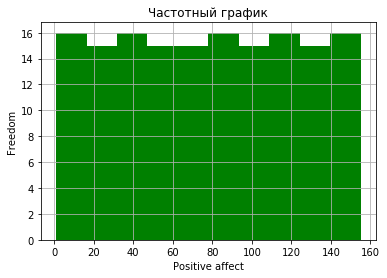

In [4]:
n, bins, patches = plt.hist(df['Freedom'], 10, facecolor='g')

plt.xlabel('Positive affect')
plt.ylabel('Freedom')
plt.title('Частотный график')
plt.grid(True)
plt.show()

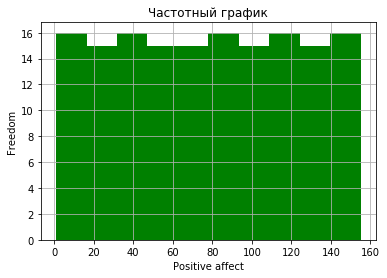

In [5]:
n, bins, patches = plt.hist(df['Positive affect'], 10, facecolor='g')

plt.xlabel('Positive affect')
plt.ylabel('Freedom')
plt.title('Частотный график')
plt.grid(True)
plt.show()

равномерное распределение


Найти медиану, моду, математическое ожидание, стандартное отклонение, дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [6]:
df.isnull().sum()

Country (region)            0
Ladder                      0
SD of Ladder                0
Positive affect             1
Negative affect             1
Social support              1
Freedom                     1
Corruption                  8
Generosity                  1
Log of GDP\nper capita      4
Healthy life\nexpectancy    6
dtype: int64

In [7]:
df1 = df.fillna(0)

In [8]:
statistics.mean(df1['Freedom']) #математическое ожидание

77.5

In [9]:
statistics.median(df['Freedom']) #медиана

71.0

In [10]:
Freedom = df1['Freedom']

In [27]:
statistics.mode(Freedom) # уникальной моды нет

StatisticsError: no unique mode; found 156 equally common values

In [12]:
min(Freedom) # минимум

0.0

In [13]:
max(Freedom) # максимум

155.0

In [14]:
statistics.pstdev(Freedom) # стандартное отклонение

45.032395746469746

In [15]:
statistics.pvariance(Freedom) # дисперсия

2027.9166666666667

In [16]:
Freedom_range = max(Freedom) - min(Freedom)
print(Freedom_range)

155.0


Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

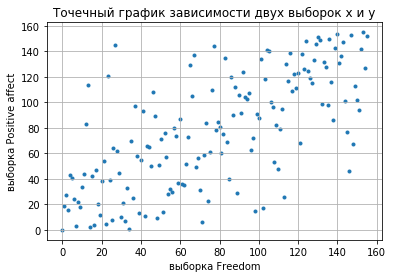

In [17]:
Freedom1 = df1['Freedom']
Positive_affect1 = df1['Positive affect']
plt.xlabel('выборка Freedom')
plt.ylabel('выборка Positive affect')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(Freedom1, Positive_affect1, marker='.')

In [18]:
from scipy.stats import pearsonr

In [19]:
corr, p_value = pearsonr(Freedom1, Positive_affect1)
print(corr) # корреляция среднего уровня присутствует

0.6878506740844937


Нормализовать данные колонки Freedom (централизация + масштабирование)

In [20]:
Freedom_1 = Freedom1 - statistics.mean(Freedom1)

from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

Freedom_2 = min_max_scaler.fit_transform(np.array(Freedom_1).reshape(-1, 1))
print(min(Freedom_2))
print(max(Freedom_2))

[-1.]
[1.]


Построить матрицу корреляций для всех колонок таблицы

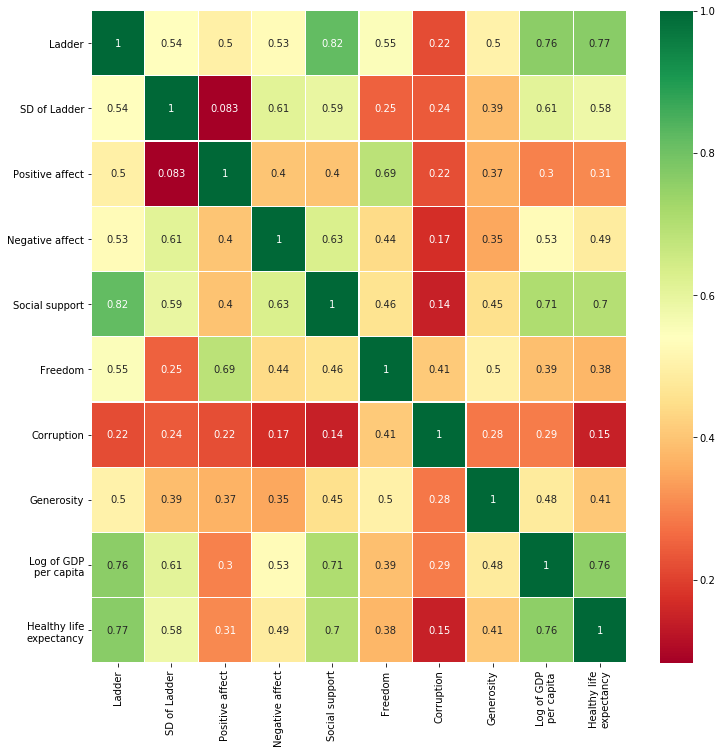

In [21]:
import seaborn as sns
sns.heatmap(df1.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

In [22]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df2=pd.read_csv(url)
df2[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

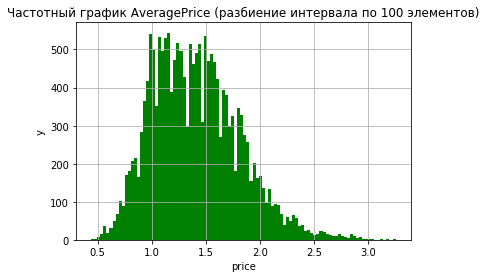

In [23]:
n, bins, patches = plt.hist(df2['AveragePrice'], 100, facecolor='g')

plt.xlabel('price')
plt.ylabel('y')
plt.title('Частотный график AveragePrice (разбиение интервала по 100 элементов)')
plt.grid(True)
plt.show() # нормальное распределение

In [24]:
AveragePrice_ = df2['AveragePrice']

Найти корреляцию в следующих колонках:

Корелляция между: 4046 - Total number of avocados with PLU 4046 sold и например Average Price. Если корелляция есть, то скорее всего, данный вид авокадо дорогой по цене и он влияет на среднюю стоимость.

In [25]:
vgvg_ = df2['4046']
AveragePrice_ = df2['AveragePrice']
corr, p_value = pearsonr(vgvg_, AveragePrice_)
print(corr) # очень маленькая отрицательная корреляция, это значит что в некоторых случаях приросте одного параметра, второй уменьшается

-0.20831704848788477
